In [16]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import shapiro, levene, ks_2samp, ttest_ind
import pingouin as pg

%matplotlib inline

In [17]:
# read data
df = pd.read_csv('../data/processed_timelines.csv')

In [18]:
# passes only
df_passes = df[df['event_type'] == 'Pass'].copy()

In [19]:
# invert away passes to also attack to the right

# init positional variable names
pos_vars = ['start_position_x', 'end_position_x', 'start_position_y', 'end_position_y']

df_passes.loc[df_passes['team'] == 'Away', pos_vars] = df_passes.loc[df_passes['team'] == 'Away', pos_vars]*(-1)

In [24]:
# Compute angle in radians
df_passes['angle_rad'] = np.arctan2(
    df_passes['end_position_y'] - df_passes['start_position_y'],
    df_passes['end_position_x'] - df_passes['start_position_x']
)

# Angle in radians
df_passes['pass_cos'] = np.cos(df_passes['angle_rad'])

In [34]:
df_passes['team_int'] = df_passes['home_team_int'].where(df_passes['team'] == 'Home', df_passes['away_team_int'])

Age group: F12
KS statistic: 0.01585887622995043, p-value: 0.3813544444757179
Age group: F13
KS statistic: 0.01913298089876425, p-value: 0.0544259097895361
Age group: F14
KS statistic: 0.02798207334530267, p-value: 0.0013920571949456247
Age group: M12
KS statistic: 0.012146055502777087, p-value: 0.3968410988638328
Age group: M13
KS statistic: 0.016713508937788224, p-value: 0.1091552577855337
Age group: M14
KS statistic: 0.02917793287616749, p-value: 0.0007653502429846251


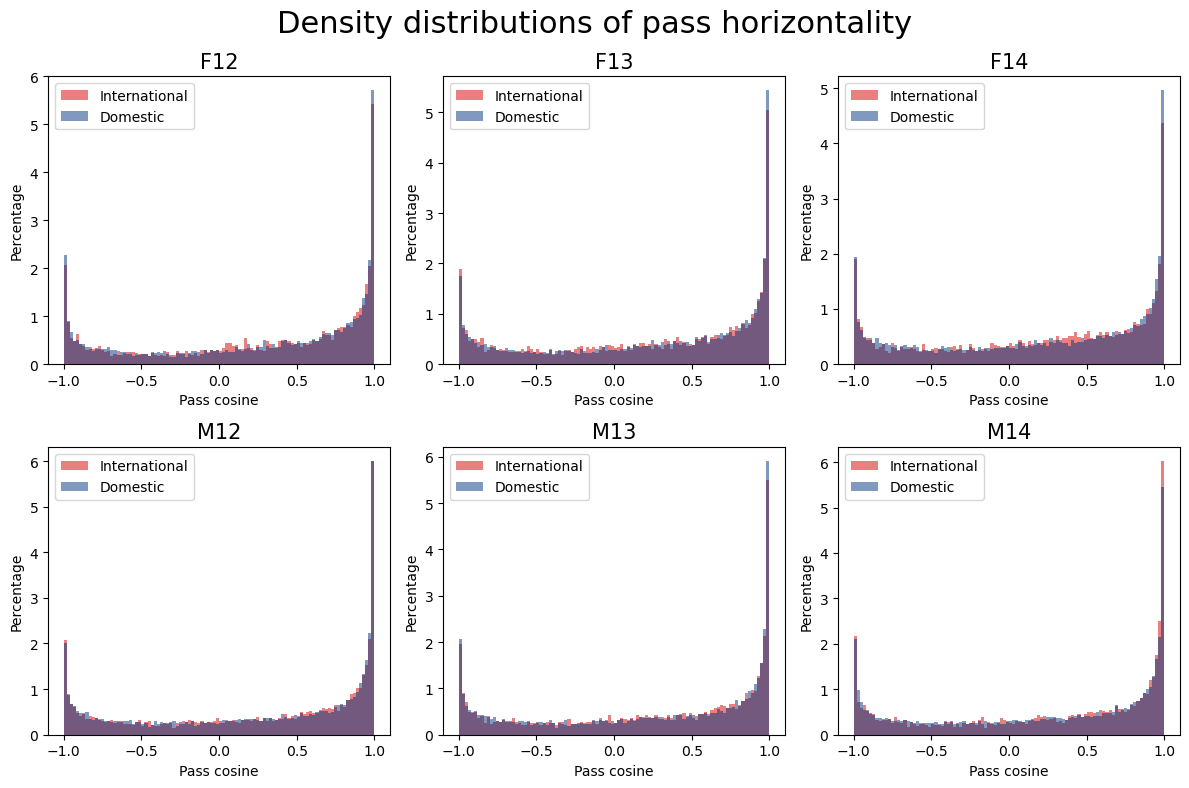

In [38]:
# create a distribution plot for the average speed
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.flatten()

# Define colors
colors = ['#003580', '#d50000']

df_grouped = df_passes.groupby('age')

for i, (group_name, df_group) in enumerate(df_grouped):
    pass_cos_dom = df_group.loc[df_group['team_int'] == 0, 'pass_cos']
    pass_cos_int = df_group.loc[df_group['team_int'] == 1, 'pass_cos']

    ax = axes[i]

    ks_stat, p = ks_2samp(pass_cos_dom, pass_cos_int)
    print(f"Age group: {group_name}")
    print(f"KS statistic: {ks_stat}, p-value: {p}")

    # Plot first histogram (overlap=True)

    ax.hist(pass_cos_int,  
        alpha=0.5, 
        label='International',
        bins=100,
        color=colors[1],
        density=True)

    ax.hist(pass_cos_dom, 
        alpha=0.5, 
        label='Finnish',
        bins=100,
        color=colors[0],
        density=True) 

    ax.set_xlabel('Pass cosine', fontsize=10)
    ax.set_ylabel('Percentage', fontsize=10)
    ax.set_title(f'{group_name}', fontsize=15)
    ax.legend(loc='upper left')

plt.suptitle("Density distributions of pass horizontality", fontsize=22)
plt.tight_layout()
plt.show()